# The Sparks Foundation Data Science & Business Analytics

## Task # 6: Prediction using Decision Tree Algorithm 



### By: Prithvi S Shetty

In [19]:
# Importing necessary packages
import numpy as np    # arthmetic calculations
import pandas as pd # 
import seaborn as sns # visualization
import matplotlib.pyplot as plt
%matplotlib inline
data =pd.read_csv('Iris.csv') 

import warnings
warnings.filterwarnings('ignore')   

In [20]:
data.drop("Id",axis=1,inplace=True)   # dropping unnecessary columns
data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
# data.isna().sum()     #checking null values : This dataset does not contain null values

In [22]:
# Here we have 3 records of SepalLength in Cm, SepalWidth in Cm, PetalLength in Cm, PetalWidth in Cm.
# of the for each species of living plants.
#Here we have 3 types of species 1. Setosa , 2. Virginica , 3. versicolor
#data['Species'].value_counts() #Gives you the total count of each type of species
#Here we have 50 records per category.

In [23]:
# Cleaning the data
data['Species']=data['Species'].str.replace("Iris-",'')   #removing 1st 5 characters

In [24]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


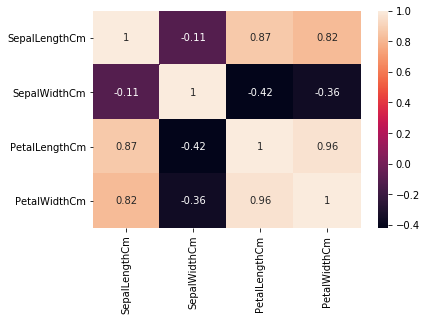

In [25]:
# Finding the correlation between each numercial attributes using heat map
corr = data.corr()                              
sns.heatmap(corr, annot=True)   
                                     # PetalLength & PetalWidth is highly correlated.
                                            #   Sepalwidth is negatively correlated 
                                            # Sepallength is postively correlated among
                                                                #  PetalLength & PetalWidth.

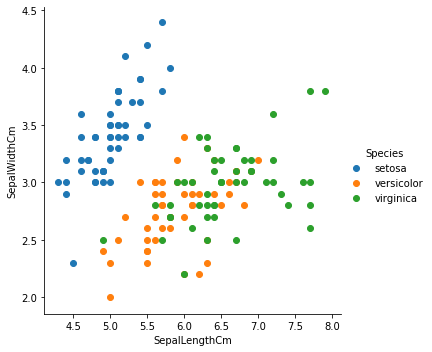

In [26]:
sns.FacetGrid(data, hue="Species", size=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

## From the above figure you can see that the distribution/spread of data points with regards to SepalLengthCm, SepalWidthCm. 

#### We can observe that of sepal length setosa ranges from 0 - 5.6 cm and sepal width ranges 1.6 - 4.5cm
#### Similary, you can categorize by comparing the attriutes of each species.


## Going on you can find similar comparission between different attributes.

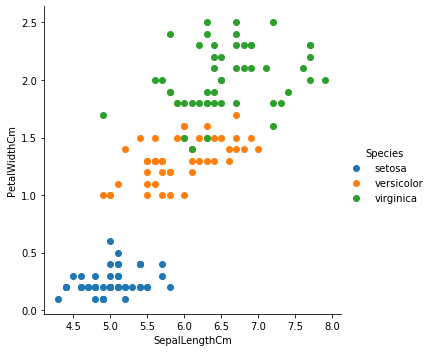

In [28]:
sns.FacetGrid(data, hue="Species", size=5).map(plt.scatter, "SepalLengthCm", "PetalWidthCm").add_legend()


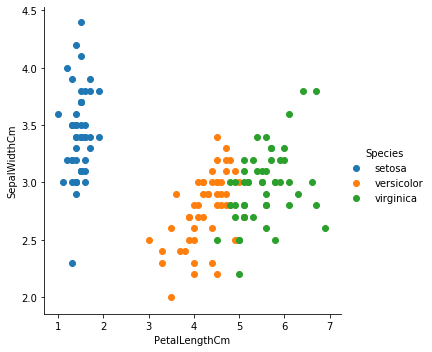

In [27]:
sns.FacetGrid(data, hue="Species", size=5).map(plt.scatter, "PetalLengthCm", "SepalWidthCm").add_legend()


In [29]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # splitting the data
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [30]:
x= data.drop(['Species'],axis=1)
y= data['Species']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.4, random_state = 42)

In [32]:
from sklearn import tree

In [33]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
dt1=dt.fit(X_train,y_train)
prediction=dt.predict(X_test)
print("Accuracy score of the mode: ", metrics.accuracy_score(prediction,y_test)*100,'%')


Accuracy score of the mode:  98.33333333333333 %


In [34]:
dt.feature_importances_  # This function provides the importance of each attributes
                        # Where we can see that PetalLength and PetalWidth are the two important 
                        # attributes that allows us to build a tree

array([0.        , 0.        , 0.07133757, 0.92866243])

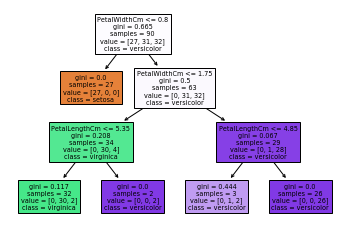

In [35]:
s=x.columns
dt=tree.plot_tree(dt1, feature_names= s,  filled= True,class_names=['setosa','virginica','versicolor'])

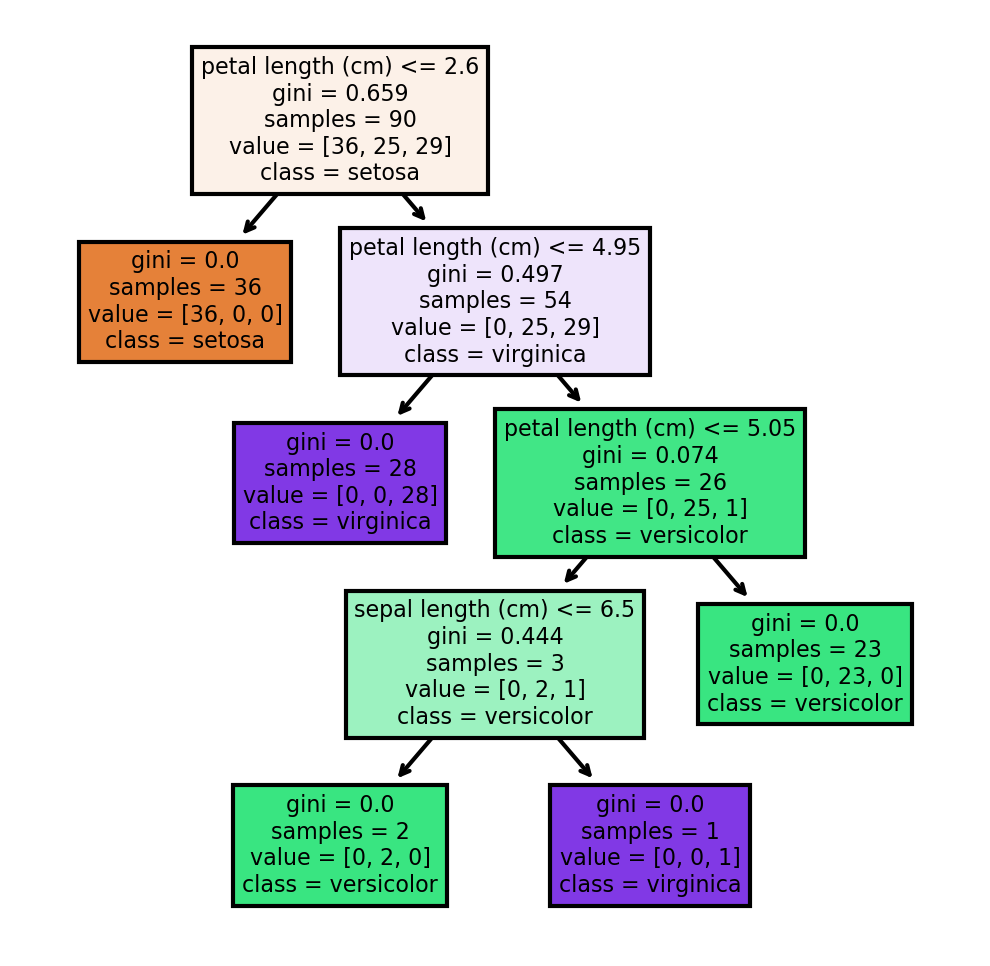

In [45]:
# Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 5)

# Train the model on the data
clf.fit(X_train, y_train)

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf,
           feature_names = fn, 
           class_names=cn,
           filled = True);                                ## At the top will be the root node and going down are the leaf nodes
                                                        ####   Gini Impurity and the no of samples in the category mentioned.
                                                        ### values and type clases

# You can save your plot if you want
#fig.savefig('imagename.png')

In [44]:
from sklearn.naive_bayes import GaussianNB
y1= y.replace({'setosa':0,'virginica':1,'versicolor':2}).copy()
X_train, X_test, y_train, y_test = train_test_split(x,y1, test_size = 0.40, random_state = 1000)
y_tst=y_test.values.reshape(-1,1)

mel_NB = GaussianNB()
mel_NB.fit(X_train,y_train)

pred=mel_NB.predict(y_tst)

print(" Accuaracy Score of GaussianNB Model: ", mel_NB.score(X_test,pred)*100,'%')

 Accuaracy Score of GaussianNB Model:  63.33333333333333 %
